# Parsing Historical Data using `layoutparser`

requires GCV account and downloaded key. To do so, set up GCP at [link](https://console.cloud.google.com/) and download a credential.

In [1]:
import layoutparser as lp

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import cv2

Population table from 1951 Indian Census (bloated scanned pdfs - `tabula` etc fail here)

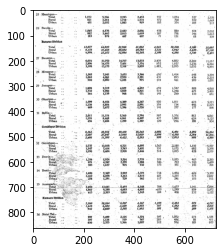

In [2]:
image = cv2.imread('UP_census_51.png')
plt.imshow(image);

In [3]:
# !export GOOGLE_APPLICATION_CREDENTIALS="/home/alal/keys/sandbox-7f8884d01b79.json"

In [4]:
# ocr_agent = lp.TesseractAgent()
ocr_agent = lp.GCVAgent.with_credential("/home/alal/keys/sandbox-7f8884d01b79.json", 
                                        languages = ['en'])

In [5]:
res = ocr_agent.detect(image, return_response=True)

In [6]:
texts  = ocr_agent.gather_text_annotations(res)
    # collect all the texts without coordinates
layout = ocr_agent.gather_full_text_annotation(res, agg_level=lp.GCVFeatureType.WORD)
    # collect all the layout elements of the `WORD` level

## Detection

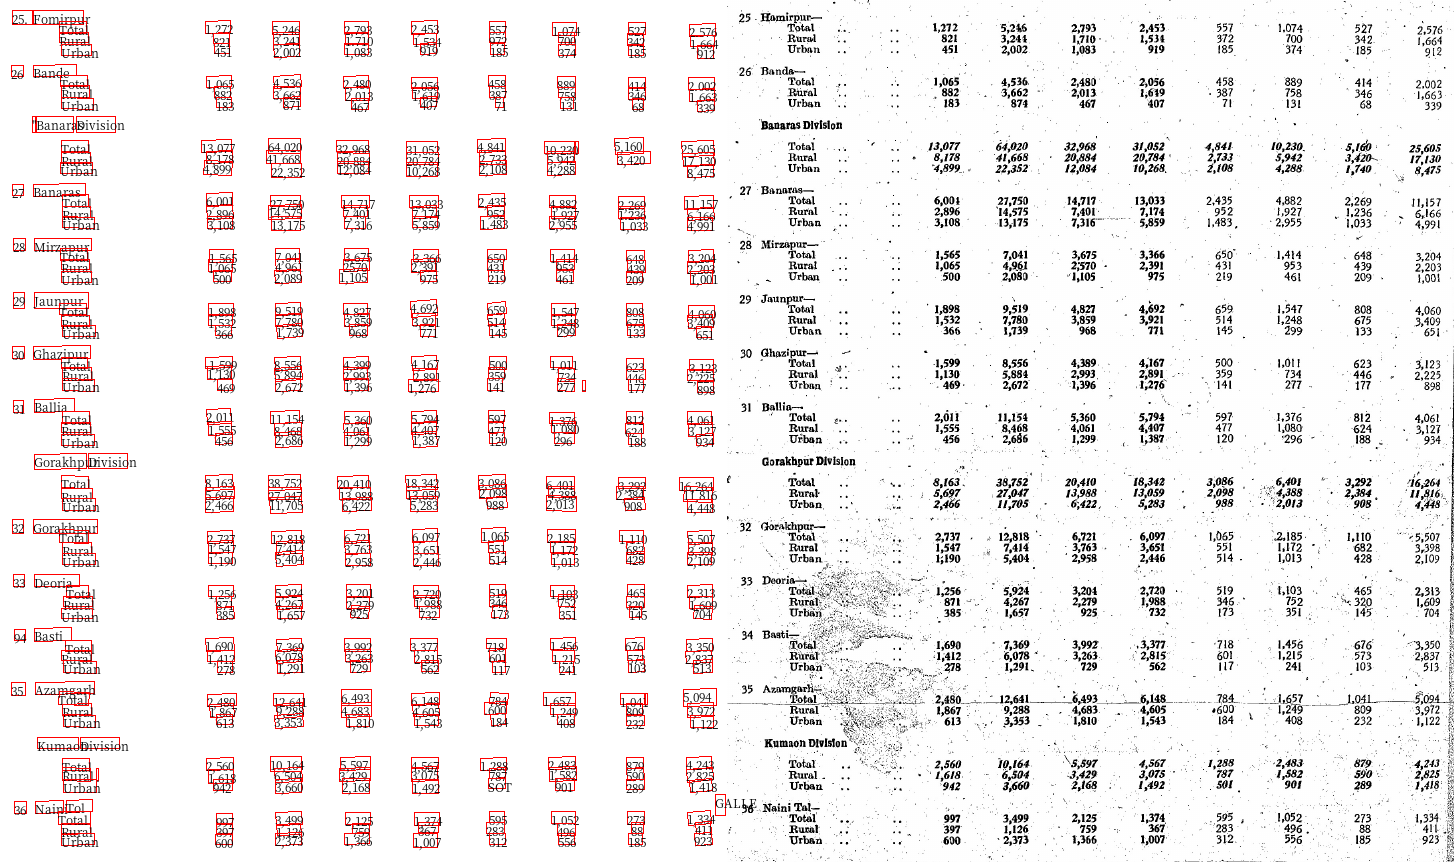

In [7]:
lp.draw_text(image, layout, font_size=12, with_box_on_text=True,
             text_box_width=1)

## location

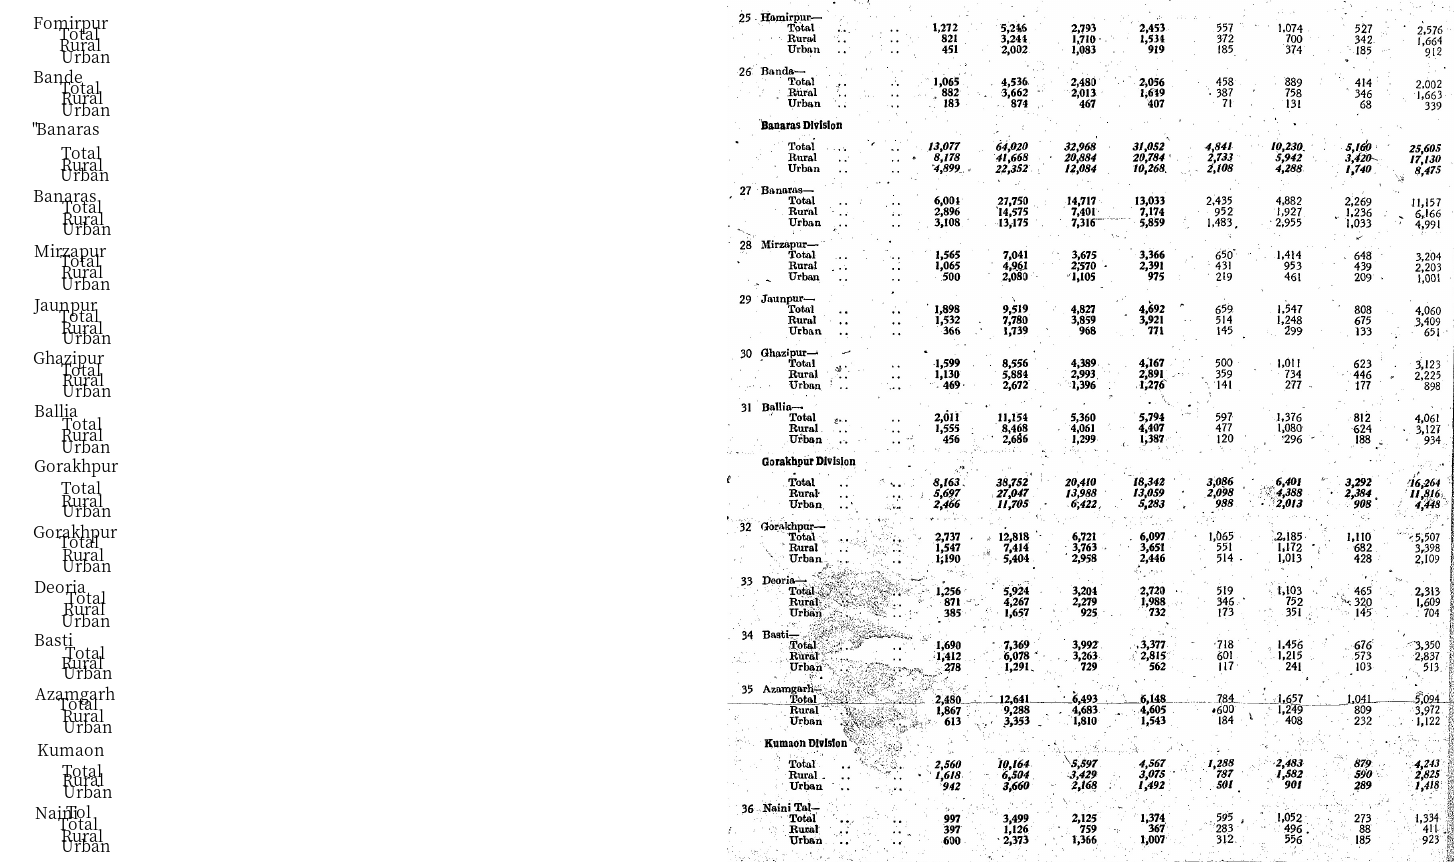

In [8]:
filter_residence = layout.filter_by(
    lp.Rectangle(x_1= 30, y_1= 5, x_2 = 103, y_2=850)
)
lp.draw_text(image, filter_residence, font_size=16)

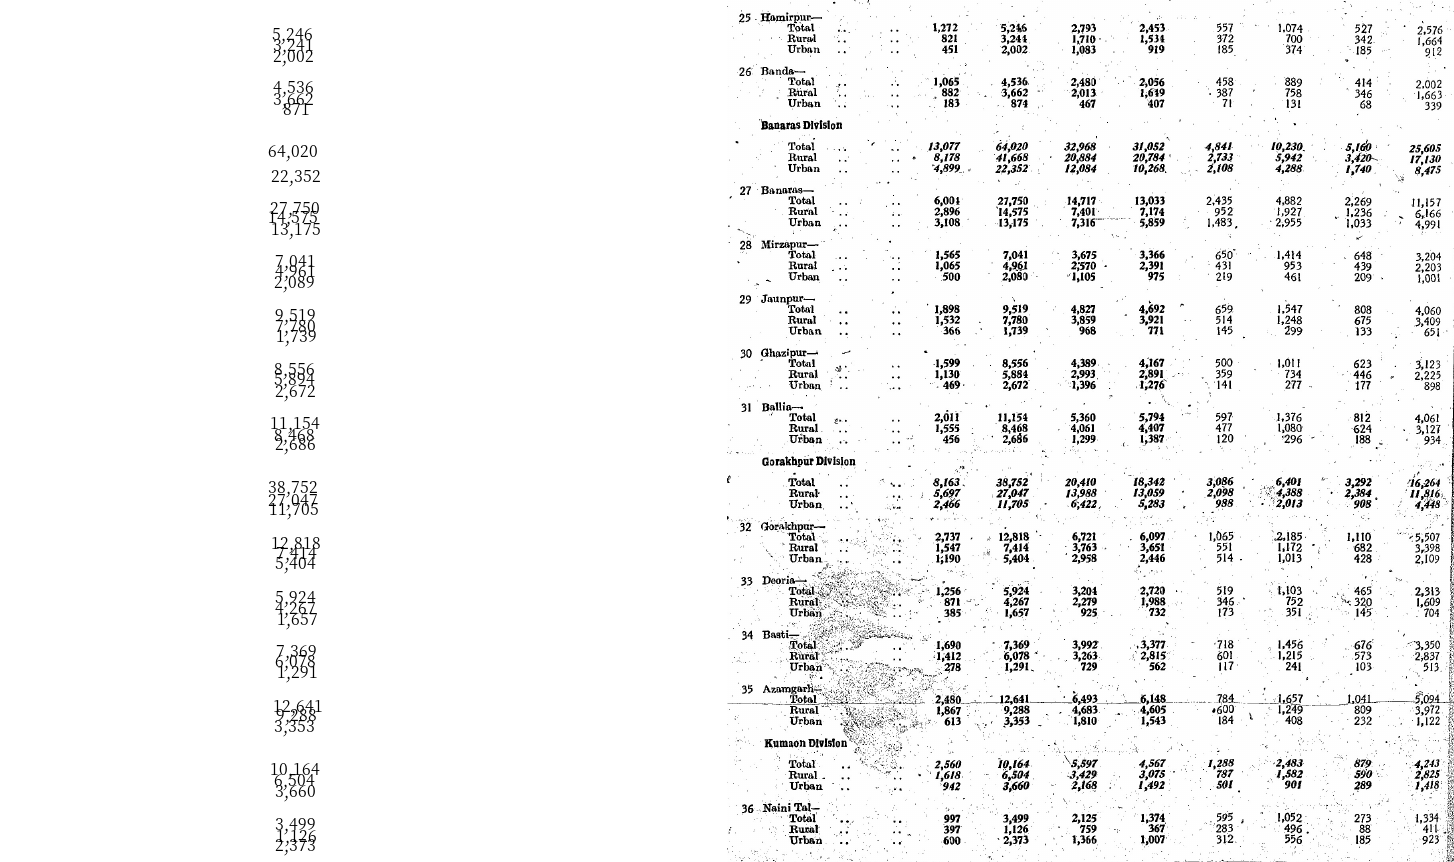

In [9]:
filter_population = layout.filter_by(
    lp.Rectangle(x_1= 268, y_1= 14, x_2 = 305, y_2=850)
)
lp.draw_text(image, filter_population, font_size=16)

## processing

In [10]:
locs  = [f.text for f in filter_residence if len(f.text) > 1]
popns = [f.text for f in filter_population]

###  grunt work
delete two aggregate division rows and cleanup.

In [11]:
locs[0] = "Hamirpur"
locs.remove('Tol')
locs

['Hamirpur',
 'Total',
 'Rural',
 'Urban',
 'Bande',
 'Total',
 'Rural',
 'Urban',
 'Banaras',
 'Total',
 'Rural',
 'Urban',
 'Banaras',
 'Total',
 'Rural',
 'Urban',
 'Mirzapur',
 'Total',
 'Rural',
 'Urban',
 'Jaunpur',
 'Total',
 'Rural',
 'Urban',
 'Ghazipur',
 'Total',
 'Rural',
 'Urban',
 'Ballia',
 'Total',
 'Rural',
 'Urban',
 'Gorakhpur',
 'Total',
 'Rural',
 'Urban',
 'Gorakhpur',
 'Total',
 'Rural',
 'Urban',
 'Deoria',
 'Total',
 'Rural',
 'Urban',
 'Basti',
 'Total',
 'Rural',
 'Urban',
 'Azamgarh',
 'Total',
 'Rural',
 'Urban',
 'Kumaon',
 'Total',
 'Rural',
 'Urban',
 'Naini',
 'Total',
 'Rural',
 'Urban']

In [12]:
loc2 = []
d = ""
for f in locs:
    if f not in ['Total', 'Rural', 'Urban']:
        d = f
    else:
        loc2.append(d + '_' + f)
loc2[:10]

['Hamirpur_Total',
 'Hamirpur_Rural',
 'Hamirpur_Urban',
 'Bande_Total',
 'Bande_Rural',
 'Bande_Urban',
 'Banaras_Total',
 'Banaras_Rural',
 'Banaras_Urban',
 'Banaras_Total',
 'Banaras_Rural',
 'Banaras_Urban',
 'Mirzapur_Total',
 'Mirzapur_Rural',
 'Mirzapur_Urban',
 'Jaunpur_Total',
 'Jaunpur_Rural',
 'Jaunpur_Urban',
 'Ghazipur_Total',
 'Ghazipur_Rural',
 'Ghazipur_Urban',
 'Ballia_Total',
 'Ballia_Rural',
 'Ballia_Urban',
 'Gorakhpur_Total',
 'Gorakhpur_Rural',
 'Gorakhpur_Urban',
 'Gorakhpur_Total',
 'Gorakhpur_Rural',
 'Gorakhpur_Urban',
 'Deoria_Total',
 'Deoria_Rural',
 'Deoria_Urban',
 'Basti_Total',
 'Basti_Rural',
 'Basti_Urban',
 'Azamgarh_Total',
 'Azamgarh_Rural',
 'Azamgarh_Urban',
 'Kumaon_Total',
 'Kumaon_Rural',
 'Kumaon_Urban',
 'Naini_Total',
 'Naini_Rural',
 'Naini_Urban']

In [13]:
# drop aggregate division rows
locs3 = [
    loc2[0:loc2.index('Banaras_Total')],
    loc2[loc2.index('Banaras_Urban')+1: loc2.index('Gorakhpur_Total')],
    loc2[loc2.index('Gorakhpur_Urban')+1:]
]
locs3 = sum(locs3, [])
locs3[:10]

['Hamirpur_Total',
 'Hamirpur_Rural',
 'Hamirpur_Urban',
 'Bande_Total',
 'Bande_Rural',
 'Bande_Urban',
 'Banaras_Total',
 'Banaras_Rural',
 'Banaras_Urban',
 'Mirzapur_Total',
 'Mirzapur_Rural',
 'Mirzapur_Urban',
 'Jaunpur_Total',
 'Jaunpur_Rural',
 'Jaunpur_Urban',
 'Ghazipur_Total',
 'Ghazipur_Rural',
 'Ghazipur_Urban',
 'Ballia_Total',
 'Ballia_Rural',
 'Ballia_Urban',
 'Gorakhpur_Total',
 'Gorakhpur_Rural',
 'Gorakhpur_Urban',
 'Deoria_Total',
 'Deoria_Rural',
 'Deoria_Urban',
 'Basti_Total',
 'Basti_Rural',
 'Basti_Urban',
 'Azamgarh_Total',
 'Azamgarh_Rural',
 'Azamgarh_Urban',
 'Kumaon_Total',
 'Kumaon_Rural',
 'Kumaon_Urban',
 'Naini_Total',
 'Naini_Rural',
 'Naini_Urban']

In [14]:
pop2 = [
    popns[0:loc2.index('Banaras_Total')],
    popns[loc2.index('Banaras_Urban'): loc2.index('Gorakhpur_Total')-1],
    popns[popns.index('11,705')+1:]
]
pop2 = sum(pop2, [])
pop2[:10]

['5,246',
 '3,241',
 '2,002',
 '4,536',
 '3,662',
 '871',
 '27,750',
 '14,575',
 '13,175',
 '7,041',
 '4,961',
 '2,089',
 '9,519',
 '7,780',
 '1,739',
 '8,556',
 '5,894',
 '2,672',
 '11,154',
 '8,468',
 '2,686',
 '12,818',
 '7,414',
 '5,404',
 '5,924',
 '4,267',
 '1,657',
 '7,369',
 '6,078',
 '1,291',
 '12,641',
 '9,288',
 '3,353',
 '10,164',
 '6,504',
 '3,660',
 '3,499',
 '1,126',
 '2,373']

In [16]:
print(len(locs3))
print(len(pop2))

## convert to df

In [19]:
data_dict = dict(zip(locs3, pop2))
df = pd.DataFrame.from_dict(data_dict, orient='index').reset_index()
df

,index,0
0,Hamirpur_Total,"5,246"
1,Hamirpur_Rural,"3,241"
2,Hamirpur_Urban,"2,002"
3,Bande_Total,"4,536"
4,Bande_Rural,"3,662"
5,Bande_Urban,871
6,Banaras_Total,"27,750"
7,Banaras_Rural,"14,575"
8,Banaras_Urban,"13,175"
9,Mirzapur_Total,"7,041"
